In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import scipy.stats as stats
import itertools as it
import math 
import pandas as pd

In [5]:
##define the fixed parameters
hatchability = 0.98  #if hatchability is density (egg or adult) depedent, then define it in the pre-adult-module or the adult-module functions 
x1 = 2.5  #parameter in finding the mean larval size
x2 = 1  #parameter in finding the mean larval size 
x3 = 0.009 #parameter in finding the mean larval size 
sigma_size = 0.45  #parameter in assigning larval sizes by drawing from a normal distribution
mc = 1.1 #critical size cut off of the larval stage for successful pupation (= 1.1 (JB) and 1 (FEJ))
x4 = 1.0  #parameter in finding the adult sizes
female_proportion = 0.5 #assign sex to the adutls 
x5 = 85 #parameter in finding fecundity
x6 = 2  #parameter in finding fecundity
sen_adsize = 1.7 #parameter related to sensivity of fecundity to adult size
sen_adden = 0.17 #parameter related to sensivity of fecundity to adult denisity
f = 0#migration rate

C:\Users\HP\AppData\Local\Temp\ipykernel_8472\2271222072.py:26: RuntimeWarning: invalid value encountered in scalar divide
  survivorship = average_number_of_adults/numegg


[0.         0.79       0.887      0.922      0.939      0.9456
 0.953      0.95371429 0.9555     0.95244444 0.9544     0.93690909
 0.93616667 0.93492308 0.93314286 0.93533333 0.932375   0.92635294
 0.92055556 0.92147368 0.9128     0.9        0.891      0.88869565
 0.87541667 0.86984    0.85984615 0.84748148 0.83778571 0.82165517
 0.8096     0.78690323 0.767      0.75927273 0.74252941 0.72428571
 0.70283333 0.67805405 0.65847368 0.63410256]
0.8570782268309722


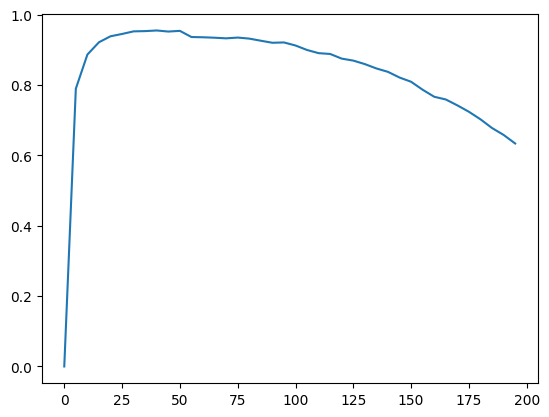

In [6]:
#I will just see the realation the surviorship with different number of larave and adults

##Pre-Adult-Module
#food = larval food amt; 1.76 (LL and LH), 2.56 (HL and HH) 

food = 1.76

def Pre_Adult_Module(numegg,food):
    
    numlarva = int(hatchability*numegg)
    mean_size = x1*(1-1/(x2+np.exp(-x3*numlarva+food)))
    size_larva_arr = abs(np.random.normal(mean_size, sigma_size, numlarva))
    numadult = (size_larva_arr>=mc).sum()
    if np.isnan(numadult):
        numadult = 0
    # size_adult_arr = x4*size_larva_arr[size_larva_arr>=mc]
    return numadult


def average_survivorship(numegg,food):

    adult_number = 0
    for i in range(0, 100):
        adult_number = adult_number + Pre_Adult_Module(numegg,food)
    average_number_of_adults = adult_number/100
    survivorship = average_number_of_adults/numegg
    return survivorship


number_of_eggs = np.arange(0, 200, 5)
survivorship_for_egg_number = []

for numegg in number_of_eggs:
    survivorship_for_egg_number.append(average_survivorship(numegg,food))

survivorship_for_egg_number = np.nan_to_num(survivorship_for_egg_number)

plt.plot(number_of_eggs, survivorship_for_egg_number)


print(survivorship_for_egg_number)
print(np.mean(survivorship_for_egg_number)/0.98)


Change the code such that it gives the number of adults vs number of eggs?

Or, Do a 2nd order degree polynomial to estimate a function that gives the number of eggs with
Then find the solution of the polynomia with +ve root to generate a cirve

In [7]:
import pyswarms as ps

def objective_function(x):
    print(x,"X")
    y = x/2
    t = np.sqrt(np.sum((y - [2, 4])**2, axis=1))
    print(t)
    return t

options = {'c1': 0.5, 'c2': 0.3, 'w':0.9}

# Call instance of PSO
optimizer = ps.single.GlobalBestPSO(n_particles=10, dimensions=2, options = options)
# Perform optimization
best_cost, best_pos = optimizer.optimize(objective_function, iters=1000)


2023-12-13 17:45:30,180 - pyswarms.single.global_best - INFO - Optimize for 1000 iters with {'c1': 0.5, 'c2': 0.3, 'w': 0.9}
pyswarms.single.global_best:   0%|          |0/1000, best_cost=0.0343

pyswarms.single.global_best:   3%|▎         |30/1000, best_cost=0.00609

[[0.93168165 0.58002545]
 [0.62565152 0.26988964]
 [0.21258351 0.65922952]
 [0.74298593 0.25162112]
 [0.37017416 0.03704541]
 [0.29155135 0.66248647]
 [0.84782729 0.94489596]
 [0.93671063 0.02171524]
 [0.25371826 0.94832274]
 [0.5753636  0.29578604]] X
[4.01467931 4.21725129 4.13011607 4.20254435 4.37562228 4.11070846
 3.86363449 4.27307762 3.99251734 4.21553814]
[[1.31624115 0.92966801]
 [1.35483604 0.73848709]
 [1.12075061 0.84581884]
 [1.25160255 0.30879245]
 [0.77067638 0.44156288]
 [0.70151946 1.01630651]
 [1.24551577 1.83106804]
 [0.94947717 0.3676928 ]
 [0.99957854 1.84172702]
 [1.32322592 0.98013391]] X
[3.78127479 3.86414486 3.85591705 4.08375936 4.10969898 3.8617337
 3.37797664 4.10967769 3.42515894 3.7564491 ]
[[1.64524207 1.34918867]
 [1.98048824 1.40204306]
 [1.94187184 1.27086388]
 [1.70823788 0.61149745]
 [1.1384016  0.97920843]
 [1.2095233  1.53878298]
 [1.6034354  2.62862292]
 [0.96687552 0.98443084]
 [1.67755994 2.64515228]
 [1.98800945 1.74773554]] X
[3.52768253 3.45

pyswarms.single.global_best:   9%|▊         |87/1000, best_cost=0.000528

[[4.03966918 8.0566793 ]
 [4.01693716 7.88123819]
 [4.10509348 8.08763963]
 [4.13907542 8.16038045]
 [3.96061505 8.01187819]
 [3.965048   8.26871673]
 [3.973891   8.33741795]
 [3.95381575 8.14020785]
 [4.03323922 8.01554738]
 [4.04195982 7.89990357]] X
[0.03459114 0.05998174 0.06842029 0.10614125 0.02056858 0.13549015
 0.16921329 0.07380926 0.0183478  0.05426767]
[[3.97453801 7.19258113]
 [3.93037615 7.86686126]
 [3.95209681 7.78552595]
 [4.05966072 8.14212376]
 [3.96402276 7.96051712]
 [3.97110927 8.23517471]
 [3.97164459 8.28100466]
 [3.89774891 8.04911209]
 [4.13794853 8.02243848]
 [4.06636974 7.84482444]] X
[0.40391012 0.07512224 0.10987929 0.07706907 0.02670796 0.11847132
 0.14121584 0.05671703 0.06988076 0.08438661]
[[3.94108931 6.59303933]
 [3.91292283 7.87804795]
 [3.82187835 7.61338957]
 [3.97959249 8.09110289]
 [3.97349961 7.93219848]
 [3.97931959 8.1315554 ]
 [3.98231739 8.15203619]
 [3.85543041 7.95088767]
 [4.1621683  8.02211543]
 [4.06451324 7.89594723]] X
[0.70409673 0.0

pyswarms.single.global_best:  11%|█         |112/1000, best_cost=0.000246

[[3.99343773 7.86114715]
 [3.98705207 7.9991833 ]
 [4.01330384 7.95263647]
 [3.99703332 7.99820686]
 [4.00159604 7.98276169]
 [3.99869759 8.01922883]
 [3.99843407 8.01089145]
 [3.98861888 8.00257579]
 [4.01854301 7.99987685]
 [3.9987783  7.95030126]] X
[0.06950392 0.00648683 0.02459825 0.00173325 0.00865602 0.00963645
 0.00550172 0.00583448 0.00927171 0.02485688]
[[3.99284084 7.54522587]
 [4.00429279 7.99889078]
 [4.0000267  7.93036849]
 [3.99594102 7.99834972]
 [4.00115291 7.97205444]
 [3.99932065 8.03793472]
 [3.99977371 7.96175374]
 [3.99824933 7.9875275 ]
 [4.00615401 8.0009236 ]
 [4.00014289 8.00380104]] X
[0.22741524 0.00221689 0.03481576 0.00219082 0.01398466 0.0189704
 0.01912346 0.00629738 0.00311147 0.00190186]
[[3.99415785 7.43465679]
 [4.01738263 7.99845152]
 [3.98654653 7.9226891 ]
 [3.99588545 7.9986742 ]
 [4.00055173 7.97046422]
 [4.00012982 8.04942209]
 [4.00107427 7.93343957]
 [4.00671262 7.98099477]
 [3.99361624 8.00075459]
 [4.00140064 8.05181558]] X
[0.2826867  0.00

pyswarms.single.global_best:  17%|█▋        |167/1000, best_cost=1.13e-5 

[[4.00302689 8.29510609]
 [4.00031476 7.99938975]
 [4.00025838 8.01771533]
 [3.9999398  7.99944827]
 [4.000692   8.00436189]
 [4.00035029 7.99105364]
 [4.00030375 8.00275851]
 [3.9876674  8.00148681]
 [3.99728409 7.99962742]
 [4.00008363 8.02115817]] X
[0.14756081 0.00034332 0.00885861 0.0002775  0.00220822 0.00447661
 0.00138759 0.00621095 0.00137067 0.01057917]
[[4.00283838 8.08454714]
 [3.99788612 7.99963066]
 [4.00025749 8.0221066 ]
 [4.00040164 7.99955043]
 [4.00091163 8.00543698]
 [4.00030452 7.99222379]
 [4.00034304 8.00022703]
 [3.98565717 8.00078469]
 [3.99596274 7.99962825]
 [3.99992621 7.95963868]] X
[0.04229738 0.00107295 0.01105405 0.00030142 0.00275644 0.00389109
 0.00020568 0.00718214 0.00202717 0.02018069]
[[4.0021148  7.88861934]
 [3.99677352 7.99983672]
 [4.00026006 8.01319577]
 [4.00067595 7.99965031]
 [4.00107141 8.0054445 ]
 [4.00022686 7.99589387]
 [4.0003784  7.99794869]
 [3.99004714 7.99965404]
 [3.99669843 7.99964704]
 [3.99997044 7.92444059]] X
[0.05570037 0.0

pyswarms.single.global_best:  20%|█▉        |195/1000, best_cost=8.69e-7

[[4.00204059 8.01521925]
 [4.00018937 7.99977866]
 [3.99998068 7.99894009]
 [4.00007532 7.99998938]
 [4.00004167 7.99921873]
 [4.00002161 8.0010088 ]
 [4.00001943 8.0002125 ]
 [4.00055445 7.99997107]
 [3.99970863 8.00001823]
 [4.00003668 8.01298143]] X
[7.67771901e-03 1.45647366e-04 5.30045477e-04 3.80324157e-05
 3.91189881e-04 5.04514330e-04 1.06695305e-04 2.77600567e-04
 1.45967966e-04 6.49073857e-03]
[[4.00143347 8.01459278]
 [4.00048668 7.99992146]
 [3.99998602 7.99926   ]
 [3.99994579 7.99996654]
 [4.00005168 8.0005635 ]
 [4.00001164 8.00032045]
 [4.00000889 8.00032668]
 [4.00083527 7.99996599]
 [3.99975685 8.00005323]
 [4.00002716 8.01844612]] X
[7.33150798e-03 2.46487201e-04 3.70064838e-04 3.18497459e-05
 2.82932191e-04 1.60329210e-04 1.63400020e-04 4.17981536e-04
 1.24452746e-04 9.22306957e-03]
[[4.00094052 8.0107256 ]
 [4.00063313 8.00001799]
 [3.99999322 7.99985392]
 [3.99983616 7.99994898]
 [4.00004594 8.00159047]
 [4.00000205 7.99961786]
 [4.00000011 8.00033823]
 [4.0006315

pyswarms.single.global_best:  26%|██▋       |263/1000, best_cost=3.91e-8

[[3.99997808 8.00098781]
 [3.99994351 8.00001902]
 [3.99999514 8.00002108]
 [3.99999054 7.99999758]
 [4.00000364 8.00019361]
 [4.00000305 7.99998584]
 [3.99999416 8.00002502]
 [4.00011259 7.99999758]
 [4.00001403 8.00000126]
 [4.00000845 8.00057058]] X
[4.94026502e-04 2.98056851e-05 1.08143390e-05 4.88026754e-06
 9.68197010e-05 7.24334322e-06 1.28486087e-05 5.63072036e-05
 7.04294431e-06 2.85320337e-04]
[[3.99998692 8.0003357 ]
 [3.99997079 8.00001107]
 [3.99999439 8.00003192]
 [3.9999886  7.99999712]
 [4.00000516 8.00015437]
 [4.00001143 8.00007361]
 [3.99999657 8.00002554]
 [4.0001536  7.99999754]
 [4.00000707 8.00000029]
 [4.00000598 8.00131018]] X
[1.67976153e-04 1.56202833e-05 1.62059428e-05 5.88018674e-06
 7.72295835e-05 3.72448452e-05 1.28847546e-05 7.68105112e-05
 3.53673627e-06 6.55096455e-04]
[[3.99999437 7.99959512]
 [4.00000738 8.00000082]
 [3.999995   8.00002565]
 [3.99999403 7.99999708]
 [4.00000473 8.00010019]
 [4.0000164  8.0001278 ]
 [4.00000052 8.00000929]
 [4.0001660

pyswarms.single.global_best:  33%|███▎      |330/1000, best_cost=5.38e-10

[[3.99999126 8.00006345]
 [4.00000377 7.99999801]
 [3.99999969 8.00000246]
 [4.00000057 7.99999991]
 [3.99999997 7.99999806]
 [4.00000007 7.9999966 ]
 [4.00000001 8.00000146]
 [3.99998793 8.0000002 ]
 [4.00000017 7.99999997]
 [3.9999965  7.99997361]] X
[3.20262644e-05 2.12916552e-06 1.23902915e-06 2.91082460e-07
 9.72642105e-07 1.69981416e-06 7.32480490e-07 6.03341893e-06
 8.59440735e-08 1.33121076e-05]
[[3.99999388 8.0000345 ]
 [3.99999939 7.99999723]
 [3.99999975 8.00000385]
 [3.99999978 7.99999996]
 [3.99999994 8.00000345]
 [3.99999984 8.00000419]
 [3.99999998 8.00000118]
 [3.99999359 8.00000026]
 [4.00000014 7.99999997]
 [3.99999601 8.00007263]] X
[1.75172622e-05 1.41851002e-06 1.92784156e-06 1.13699203e-07
 1.72287294e-06 2.09826671e-06 5.91593363e-07 3.20518876e-06
 7.35461583e-08 3.63689557e-05]
[[3.99999747 8.00000037]
 [3.99999575 7.99999684]
 [3.99999988 8.00000386]
 [3.99999918 7.99999999]
 [3.99999992 8.00000671]
 [3.99999962 8.00000871]
 [3.99999997 8.00000033]
 [4.0000016

pyswarms.single.global_best:  36%|███▌      |362/1000, best_cost=4.42e-10

[[3.99999865 7.9999917 ]
 [3.99999932 7.99999987]
 [3.99999985 7.9999998 ]
 [3.9999999  8.00000002]
 [3.99999999 8.00000154]
 [3.99999993 7.99999873]
 [3.99999998 8.00000024]
 [4.00000147 8.00000041]
 [4.         8.00000001]
 [3.99999944 8.00000277]] X
[4.20225789e-06 3.43976351e-07 1.26710965e-07 5.06815564e-08
 7.69291630e-07 6.36610389e-07 1.22528523e-07 7.63111798e-07
 5.48673041e-09 1.41331089e-06]
[[3.99999911 7.99998804]
 [3.9999995  7.99999993]
 [3.99999997 7.99999929]
 [3.99999988 8.00000002]
 [4.00000001 8.00000129]
 [3.99999995 7.99999936]
 [4.00000001 8.00000016]
 [4.00000244 8.0000004 ]
 [4.         8.        ]
 [3.99999973 8.00000627]] X
[5.99507390e-06 2.53503920e-07 3.55712354e-07 5.98290174e-08
 6.44691071e-07 3.21347462e-07 8.03123963e-08 1.23503141e-06
 2.13302213e-09 3.13623044e-06]
[[3.9999993  7.99998844]
 [3.9999998  7.99999999]
 [4.00000007 7.99999911]
 [3.99999993 8.00000001]
 [4.00000002 8.00000054]
 [3.99999995 8.00000033]
 [4.00000006 8.00000002]
 [4.0000026

pyswarms.single.global_best:  42%|████▎     |425/1000, best_cost=2.64e-10

[[3.99999965 8.00000153]
 [4.00000005 7.99999999]
 [3.99999998 8.00000019]
 [4.00000001 8.        ]
 [3.99999999 7.99999991]
 [4.         8.        ]
 [3.99999999 8.00000007]
 [4.00000017 7.99999999]
 [4.         8.        ]
 [4.         7.9999997 ]] X
[7.85122228e-07 2.61892498e-08 9.61223751e-08 4.75878054e-09
 4.34003493e-08 2.92894388e-09 3.69338214e-08 8.75764035e-08
 1.73180253e-09 1.49778204e-07]
[[3.99999979 7.99999993]
 [4.00000002 7.99999999]
 [4.         8.00000011]
 [3.99999999 8.        ]
 [4.         8.00000002]
 [4.         7.99999986]
 [4.         8.00000007]
 [4.00000041 7.99999999]
 [4.         8.        ]
 [4.         7.99999981]] X
[1.10687702e-07 1.29243427e-08 5.27561016e-08 6.90785503e-09
 1.06852798e-08 6.97076065e-08 3.32064135e-08 2.05490753e-07
 1.95438300e-09 9.68367683e-08]
[[3.99999997 7.99999851]
 [3.99999998 7.99999999]
 [4.00000003 7.99999998]
 [3.99999997 8.        ]
 [4.         8.00000011]
 [4.         7.99999981]
 [4.         8.00000004]
 [4.0000004

pyswarms.single.global_best:  49%|████▊     |487/1000, best_cost=3.59e-12

[[3.99999999 8.00000003]
 [4.00000001 8.        ]
 [4.         8.        ]
 [4.         8.        ]
 [4.         8.00000002]
 [4.         7.99999999]
 [4.         7.99999999]
 [4.00000004 8.        ]
 [4.         8.        ]
 [4.         8.00000001]] X
[1.70218102e-08 5.21671405e-09 1.85891448e-09 3.15627167e-10
 7.54794617e-09 6.48294762e-09 4.67801341e-09 2.17348259e-08
 2.64023526e-10 6.21790696e-09]
[[3.99999998 8.00000023]
 [4.         8.        ]
 [4.         7.99999999]
 [4.         8.        ]
 [4.         8.00000003]
 [4.         7.99999998]
 [4.         8.        ]
 [4.00000002 8.        ]
 [4.         8.        ]
 [4.         8.00000001]] X
[1.16995966e-07 3.27443619e-10 3.31659669e-09 1.35571855e-09
 1.26621338e-08 1.12534698e-08 1.97298022e-09 1.13690924e-08
 2.63910569e-10 2.86879222e-09]
[[3.99999997 8.00000032]
 [3.99999999 8.        ]
 [4.         7.99999999]
 [4.         8.        ]
 [4.         8.00000003]
 [4.         7.99999998]
 [4.         8.        ]
 [4.       

pyswarms.single.global_best:  55%|█████▍    |548/1000, best_cost=1.06e-12

[[4.         8.00000006]
 [4.         8.        ]
 [4.         8.        ]
 [4.         8.        ]
 [4.         8.        ]
 [4.         8.        ]
 [4.         8.        ]
 [4.         8.        ]
 [4.         8.        ]
 [4.         8.        ]] X
[2.97925230e-08 6.20701904e-10 2.52425262e-10 8.91288065e-11
 5.76772325e-11 4.02621712e-10 4.98598895e-10 1.82356462e-09
 2.16890207e-11 5.91177498e-10]
[[4.         8.00000007]
 [4.         8.        ]
 [4.         8.        ]
 [4.         8.        ]
 [4.         8.        ]
 [4.         8.        ]
 [4.         8.        ]
 [4.         8.        ]
 [4.         8.        ]
 [4.         8.        ]] X
[3.46426067e-08 1.43632271e-10 5.60651441e-11 1.74434741e-11
 6.57429999e-10 4.37638023e-10 2.45222146e-10 1.49122238e-09
 2.56347432e-11 1.27325196e-09]
[[4.         8.00000008]
 [4.         8.        ]
 [4.         8.        ]
 [4.         8.        ]
 [4.         8.        ]
 [4.         8.        ]
 [4.         8.        ]
 [4.       

pyswarms.single.global_best:  58%|█████▊    |579/1000, best_cost=1.66e-13

[[4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]] X
[1.15194091e-09 1.81621333e-11 6.79300538e-11 1.45111185e-11
 1.08203171e-10 3.15617248e-11 2.08260896e-11 5.15961584e-10
 1.01797611e-11 3.62845880e-11]
[[4.         8.00000001]
 [4.         8.        ]
 [4.         8.        ]
 [4.         8.        ]
 [4.         8.        ]
 [4.         8.        ]
 [4.         8.        ]
 [4.         8.        ]
 [4.         8.        ]
 [4.         8.        ]] X
[3.31405784e-09 2.83471416e-11 6.05530121e-11 2.03778015e-11
 8.51925304e-11 1.17554974e-11 2.33194520e-11 2.55213204e-10
 7.13390183e-12 3.29802394e-11]
[[4.         8.00000001]
 [4.         8.        ]
 [4.         8.        ]
 [4.         8.        ]
 [4.         8.        ]
 [4.         8.        ]
 [4.         8.        ]
 [4.         8.        ]
 [4.         8.        ]
 [4.         8.        ]] X
[3.07237180e-09 2.33830553e-11 2.43791305e-11 2.12401987e-11
 1.74973937e-11 9.10666811e-12 5

pyswarms.single.global_best:  64%|██████▍   |638/1000, best_cost=2.54e-14

[[4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]] X
[4.53272344e-10 8.32339407e-13 7.67012764e-12 4.35221484e-12
 1.80753450e-11 2.04104686e-12 7.86507708e-12 4.10914043e-11
 6.77855594e-13 6.21188472e-12]
[[4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]] X
[7.00638849e-10 6.48814944e-13 1.01585106e-11 3.83325381e-12
 4.68002198e-12 1.37069298e-12 6.77677049e-12 2.31308778e-11
 7.05862302e-13 4.63923750e-12]
[[4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]] X
[6.95710081e-10 1.63793472e-12 4.91165953e-12 9.77529427e-13
 8.65440028e-12 3.56684550e-12 4.21866371e-12 1.78649053e-12
 4.28358804e-13 1.57620549e-12]
[[4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]] X
[4.64222450e-10 2.12245579e-12 2.64642388e-12 2.11494264e-12
 1.72945833e-11 2.66652718e-12 1.73245281e-12 1.77604011e-11
 1.13923381e-13 1.37275869e-12]
[[4. 8.]
 [4

pyswarms.single.global_best:  66%|██████▋   |664/1000, best_cost=5.02e-15

[[4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]] X
[1.15759045e-10 2.25405352e-13 2.14733886e-12 9.62567639e-13
 2.25999736e-12 4.11236739e-13 1.10510036e-12 1.99699065e-11
 1.20562042e-13 9.92311477e-13]
[[4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]] X
[3.13262894e-11 4.84545898e-14 1.97017619e-12 1.60716038e-12
 4.82148355e-12 7.50536516e-13 1.26119037e-12 3.29457581e-11
 8.67509829e-14 9.31763297e-13]
[[4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]] X
[5.60437982e-11 2.70917713e-13 6.53498963e-13 1.73822241e-12
 1.06014249e-11 9.33729114e-13 1.17770960e-12 2.64201876e-11
 3.30093036e-14 6.86827322e-13]
[[4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]] X
[1.10364260e-10 3.65126681e-13 7.78607441e-13 6.90961854e-13
 1.37868838e-11 5.06469872e-13 7.45488100e-13 7.42536669e-12
 2.71221827e-14 3.40255809e-13]
[[4. 8.]
 [4

pyswarms.single.global_best:  72%|███████▏  |715/1000, best_cost=6.28e-16

[[4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]] X
[2.69919502e-11 7.15469616e-14 5.53720347e-13 2.11517155e-13
 2.97539933e-12 1.70635608e-13 2.20391882e-13 6.96412539e-12
 8.34367874e-15 1.84683456e-13]
[[4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]] X
[1.90988069e-11 6.45630725e-14 7.49797814e-13 1.28064888e-13
 2.70894418e-13 2.40926071e-14 1.60437484e-13 6.04113591e-12
 6.96880546e-15 2.56205222e-13]
[[4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]] X
[3.82863625e-13 2.97448619e-14 5.01938742e-13 2.13162821e-14
 2.44515519e-12 1.28221291e-13 4.26331424e-14 1.97402150e-12
 1.76801056e-14 2.37438267e-13]
[[4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]] X
[1.78426760e-11 6.40474567e-15 1.14271670e-13 1.15944711e-13
 3.81872683e-12 2.46170069e-13 9.16194356e-14 3.20888855e-12
 2.13913213e-14 1.57816084e-13]
[[4. 8.]
 [4

pyswarms.single.global_best:  77%|███████▋  |767/1000, best_cost=0       

[[4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]] X
[1.43405833e-12 1.33226763e-15 2.19826065e-13 3.55271368e-14
 2.72894413e-12 3.64396778e-14 1.19904087e-14 2.03313430e-12
 4.17183937e-15 5.91622839e-14]
[[4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]] X
[1.00378672e-12 1.33226763e-15 4.45386941e-13 2.44249065e-14
 2.74980957e-12 3.64396778e-14 6.21724894e-15 6.52855584e-13
 7.10889596e-15 5.10881161e-14]
[[4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]] X
[2.82320246e-12 1.33226763e-15 3.69543400e-13 1.60118642e-15
 1.88072415e-12 2.66601515e-14 1.77635684e-15 8.62642576e-13
 4.98983189e-15 2.19408835e-14]
[[4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]] X
[2.58826377e-12 9.93013661e-16 1.95557773e-13 1.93993803e-14
 2.98016950e-13 4.46304132e-15 7.99360578e-15 2.06110648e-12
 2.22044605e-15 2.80058022e-14]
[[4. 8.]
 [4

pyswarms.single.global_best:  79%|███████▉  |794/1000, best_cost=0

[[4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]] X
[1.50364698e-13 8.88178420e-16 1.15548565e-14 7.54951657e-15
 7.03439551e-13 1.77635684e-15 2.22044605e-15 2.30808932e-13
 4.44089210e-16 2.39149358e-15]
[[4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]] X
[2.79494099e-14 1.33226763e-15 1.59933783e-14 3.55271368e-15
 8.26010228e-13 8.88178420e-16 4.44089210e-16 4.40653994e-13
 4.44089210e-16 4.09430021e-15]
[[4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]] X
[1.80449053e-13 4.44089210e-16 1.68753900e-14 8.88178420e-16
 5.28475303e-13 0.00000000e+00 8.88178420e-16 5.21154156e-13
 0.00000000e+00 4.52883909e-15]
[[4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]] X
[2.30105179e-13 0.00000000e+00 9.77248553e-15 4.21884749e-15
 6.93689521e-14 8.88178420e-16 1.77635684e-15 2.76416550e-13
 2.22044605e-16 3.58036167e-15]
[[4. 8.]
 [4

pyswarms.single.global_best:  85%|████████▌ |850/1000, best_cost=0

[[4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]] X
[2.58040289e-14 0.00000000e+00 1.77635684e-15 4.44089210e-16
 1.02140518e-14 0.00000000e+00 0.00000000e+00 2.11723926e-14
 0.00000000e+00 0.00000000e+00]
[[4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]] X
[8.10386762e-15 0.00000000e+00 0.00000000e+00 6.66133815e-16
 3.90823736e-14 0.00000000e+00 0.00000000e+00 3.72214584e-15
 0.00000000e+00 0.00000000e+00]
[[4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]] X
[1.11221963e-14 0.00000000e+00 1.77635684e-15 6.66133815e-16
 4.88518316e-14 0.00000000e+00 0.00000000e+00 2.06011448e-14
 0.00000000e+00 0.00000000e+00]
[[4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]] X
[2.13162821e-14 0.00000000e+00 2.22044605e-15 4.44089210e-16
 3.41948692e-14 0.00000000e+00 0.00000000e+00 3.15803325e-14
 0.00000000e+00 0.00000000e+00]
[[4. 8.]
 [4

pyswarms.single.global_best:  90%|█████████ |901/1000, best_cost=0

[[4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]] X
[4.44089210e-16 0.00000000e+00 0.00000000e+00 0.00000000e+00
 2.22044605e-15 0.00000000e+00 0.00000000e+00 3.14018492e-15
 0.00000000e+00 0.00000000e+00]
[[4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]] X
[4.00296604e-15 0.00000000e+00 8.88178420e-16 0.00000000e+00
 3.55271368e-15 0.00000000e+00 0.00000000e+00 6.28036983e-16
 0.00000000e+00 0.00000000e+00]
[[4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]] X
[6.21724894e-15 0.00000000e+00 8.88178420e-16 0.00000000e+00
 3.10862447e-15 0.00000000e+00 0.00000000e+00 3.58036167e-15
 0.00000000e+00 0.00000000e+00]
[[4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]] X
[6.66133815e-15 0.00000000e+00 8.88178420e-16 0.00000000e+00
 4.44089210e-16 0.00000000e+00 0.00000000e+00 4.46304132e-15
 0.00000000e+00 0.00000000e+00]
[[4. 8.]
 [4

pyswarms.single.global_best:  96%|█████████▌|956/1000, best_cost=0

[[4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]] X
[8.88178420e-16 0.00000000e+00 8.88178420e-16 0.00000000e+00
 4.44089210e-16 0.00000000e+00 0.00000000e+00 1.33226763e-15
 0.00000000e+00 0.00000000e+00]
[[4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]] X
[1.33226763e-15 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 6.66133815e-16
 0.00000000e+00 0.00000000e+00]
[[4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]] X
[1.33226763e-15 0.00000000e+00 8.88178420e-16 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 4.44089210e-16
 0.00000000e+00 0.00000000e+00]
[[4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]] X
[1.33226763e-15 0.00000000e+00 1.33226763e-15 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 1.33226763e-15
 0.00000000e+00 0.00000000e+00]
[[4. 8.]
 [4

pyswarms.single.global_best: 100%|██████████|1000/1000, best_cost=0
2023-12-13 17:45:34,087 - pyswarms.single.global_best - INFO - Optimization finished | best cost: 0.0, best pos: [4. 8.]


[[4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]] X
[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 2.22044605e-16
 0.00000000e+00 0.00000000e+00]
[[4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]] X
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[[4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]] X
[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 4.4408921e-16 0.0000000e+00 0.0000000e+00]
[[4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]] X
[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00
 0.0000000e+00 0.0000000e+00 4.4408921e-16 0.0000000e+00 0.0000000e+00]
[[4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]
 [4. 8.]] X
[0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000000e+00 0.0000